In [4]:
import pandas as pd
import os
import numpy as np
from math import floor

from termcolor import colored as cl
import matplotlib.pyplot as plt

In [263]:
current_dir = os.getcwd()
print(current_dir)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

C:\Users\I933927\Documents\capstone


## 1 Simple Moving Averages (SMA)
## 2 Moving Average Convergence Divergence (MACD) use EMA
= short (fast) 12 - long (slow) 26

* 2008 - 2010
* 2011 - 2013
* 2014 - 2016
* 2017 - 2019
* 2020 - 2022

Get Data
DJIA

MACD: 
https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b

### Download Data
#### HSI

In [5]:
import yfinance as yf

HSI_df=yf.download('^HSI', start='2008-01-01', end='2022-12-31')

HSI_df_A_train = HSI_df.loc['2008-01-01':'2010-12-31']
HSI_df_A_test = HSI_df.loc['2011-01-01':'2013-12-31']
HSI_df_B_train = HSI_df.loc['2008-01-01':'2013-12-31']
HSI_df_B_test = HSI_df.loc['2014-01-01':'2016-12-31']
HSI_df_C_train = HSI_df.loc['2008-01-01':'2016-12-31']
HSI_df_C_test = HSI_df.loc['2017-01-01':'2019-12-31']
HSI_df_D_train = HSI_df.loc['2008-01-01':'2019-12-31']
HSI_df_D_test = HSI_df.loc['2020-01-01':'2022-12-31']

HSI_df_test = HSI_df.loc['2022-10-01':'2022-12-31']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^HSI: No data found for this date range, symbol may be delisted


In [15]:
HSI_df_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03 00:00:00+08:00,17050.250000,17252.109375,16906.960938,17079.509766,17079.509766,1361001600
2022-10-05 00:00:00+08:00,17811.970703,18164.199219,17682.849609,18087.970703,18087.970703,2256107700
2022-10-06 00:00:00+08:00,18100.480469,18143.849609,17958.140625,18012.150391,18012.150391,1082368000
2022-10-07 00:00:00+08:00,17851.619141,17881.869141,17717.730469,17740.050781,17740.050781,1129251000
2022-10-10 00:00:00+08:00,17449.359375,17449.359375,17174.609375,17216.660156,17216.660156,1771824300


#### DJIA

In [9]:
DJIA_df=yf.download('^DJI', start='2008-01-01', end='2022-12-31')

DJIA_df_A_train = DJIA_df.loc['2008-01-01':'2010-12-31']
DJIA_df_A_test = DJIA_df.loc['2011-01-01':'2013-12-31']
DJIA_df_B_train = DJIA_df.loc['2008-01-01':'2013-12-31']
DJIA_df_B_test = DJIA_df.loc['2014-01-01':'2016-12-31']
DJIA_df_C_train = DJIA_df.loc['2008-01-01':'2016-12-31']
DJIA_df_C_test = DJIA_df.loc['2017-01-01':'2019-12-31']
DJIA_df_D_train = DJIA_df.loc['2008-01-01':'2019-12-31']
DJIA_df_D_test = DJIA_df.loc['2020-01-01':'2022-12-31']

DJIA_df_test = DJIA_df.loc['2022-10-01':'2022-12-31']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: No timezone found, symbol may be delisted


In [54]:
def plot_ma(prices, ma1, ma2, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(ma1, color = 'grey', linewidth = 1.5, label = 'ma1')
    ax2.plot(ma2, color = 'skyblue', linewidth = 1.5, label = 'ma2')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

In [12]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

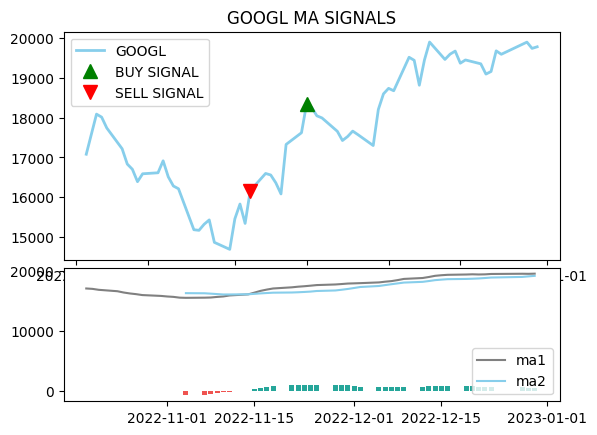

In [61]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(HSI_df_test['Close'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax1.plot(HSI_df_test.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(HSI_df_test.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('GOOGL MA SIGNALS')
ax2.plot(djia_ma['ma1'], color = 'grey', linewidth = 1.5, label = 'ma1')
ax2.plot(djia_ma['ma2'], color = 'skyblue', linewidth = 1.5, label = 'ma2')

for i in range(len(djia_ma)):
    if str(djia_ma['hist'][i])[0] == '-':
        ax2.bar(djia_ma.index[i], djia_ma['hist'][i], color = '#ef5350')
    else:
        ax2.bar(djia_ma.index[i], djia_ma['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

#### Test MACD functions

In [16]:
djia_macd = get_macd(HSI_df_test['Close'], 26, 12, 9)
djia_macd.tail()

,macd,signal,hist
Date,,,
2022-12-22 00:00:00+08:00,515.627667,587.603672,-71.976005
2022-12-23 00:00:00+08:00,502.902837,570.663505,-67.760668
2022-12-28 00:00:00+08:00,511.600414,558.850887,-47.250473
2022-12-29 00:00:00+08:00,499.998947,547.080499,-47.081552
2022-12-30 00:00:00+08:00,488.423869,535.349173,-46.925304


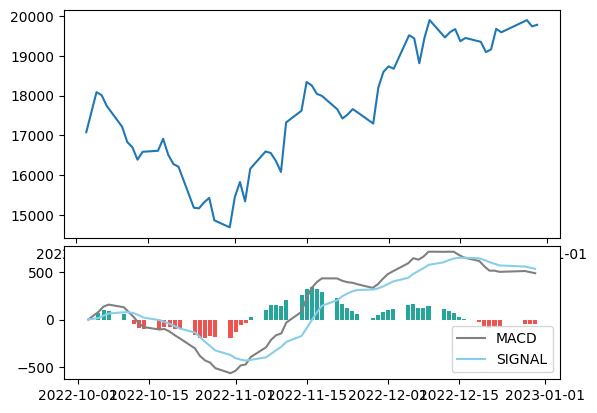

In [17]:
plot_macd(HSI_df_test['Close'], djia_macd['macd'], djia_macd['signal'], djia_macd['hist'])

##### calculate price and signal

In [84]:
buy_price, sell_price, macd_signal = implement_macd_strategy(HSI_df_test['Close'], djia_macd)

##### plot buy sell signal

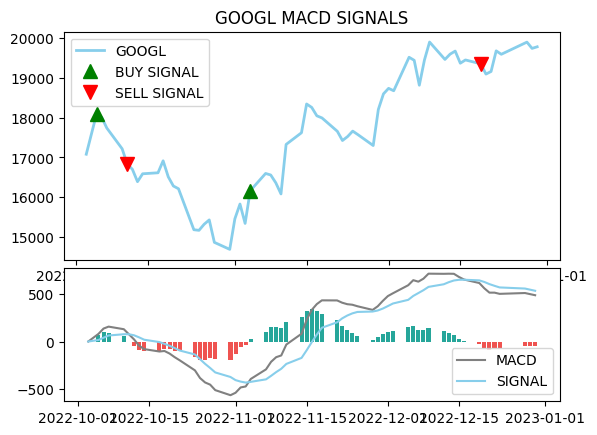

In [85]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(HSI_df_test['Close'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax1.plot(HSI_df_test.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(HSI_df_test.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('GOOGL MACD SIGNALS')
ax2.plot(djia_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(djia_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(djia_macd)):
    if str(djia_macd['hist'][i])[0] == '-':
        ax2.bar(djia_macd.index[i], djia_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(djia_macd.index[i], djia_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

##### find position strategy

In [86]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] >= 1:
        position.append(1)
    else:
        position.append(0)
        
for i in range(len(HSI_df_test['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = djia_macd['macd']
signal = djia_macd['signal']
close_price = HSI_df_test['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(HSI_df_test.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(HSI_df_test.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,macd,signal,macd_signal,macd_position
Date,,,,,
2022-10-03 00:00:00+08:00,17079.509766,0.000000,0.000000,0,0
2022-10-05 00:00:00+08:00,18087.970703,80.447026,16.089405,1,1
2022-10-06 00:00:00+08:00,18012.150391,136.510204,40.173565,0,1
2022-10-07 00:00:00+08:00,17740.050781,157.172723,63.573397,0,1
2022-10-10 00:00:00+08:00,17216.660156,129.818205,76.822358,0,1
...,...,...,...,...,...
2022-12-22 00:00:00+08:00,19679.220703,515.627667,587.603672,0,0
2022-12-23 00:00:00+08:00,19593.060547,502.902837,570.663505,0,0
2022-12-28 00:00:00+08:00,19898.910156,511.600414,558.850887,0,0


In [87]:
print(strategy.head(n=10).to_string(index=False))

       Close        macd      signal  macd_signal  macd_position
17079.509766    0.000000    0.000000            0              0
18087.970703   80.447026   16.089405            1              1
18012.150391  136.510204   40.173565            0              1
17740.050781  157.172723   63.573397            0              1
17216.660156  129.818205   76.822358            0              1
16832.359375   76.250720   76.708031           -1              0
16701.029297   22.936465   65.953718            0              0
16389.109375  -43.977847   43.967405            0              0
16587.689453  -80.061273   19.161669            0              0
16612.900391 -105.408255   -5.752316            0              0
16914.580078 -100.000151  -24.601883            0              0
16511.279297 -126.795573  -45.040621            0              0
16280.219727 -164.776275  -68.987752            0              0
16211.120117 -198.167663  -94.823734            0              0
15180.690430 -304.270205 

### calculate returns 

In [30]:
googl_ret = pd.DataFrame(np.diff(HSI_df_test['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(googl_ret)):
    try:
        returns = googl_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/HSI_df_test['Close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in GOOGL : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in GOOGL : 14722.6
Profit percentage of the MACD strategy : 14%


### combine all steps

#### get MA / MACD
#### plot MA / MACD ^^
#### calculate price and signal
#### plot buy sell signal ^^
#### find position strategy
#### calculate returns

In [156]:
def calculate_ma_strategy(df, slow, fast): 
    # calculate ma 
    price = df['Close']
    ma1 = pd.DataFrame(price.rolling(fast).mean()).rename(columns = {'Close':'ma1'})
    ma2 = pd.DataFrame(price.rolling(slow).mean()).rename(columns = {'Close':'ma2'})
    hist = pd.DataFrame(ma1['ma1'] - ma2['ma2']).rename(columns = {0:'hist'})
    frames =  [ma1, ma2, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find buy / sell / signal 
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data['ma1'][i] > data['ma2'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['ma1'][i] < data['ma2'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    # find position
    position = []
    for i in range(len(ma_signal)):
        if ma_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if ma_signal[i] == 1:
            position[i] = 1
        elif ma_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]

    ma1 = data['ma1']
    ma2 = data['ma2']
    close_price = df['Close']
    ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(df.index)
    
    frames = [ma_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    
    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['ma_position'])):
        if data_return['ma_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['ma_position'][i] == 1:
            if data_return['ma_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    return data_return


In [243]:
def calculate_ma_return(df, slow, fast, investment_value): 
    # calculate ma 
    price = df['Close']
    ma1 = pd.DataFrame(price.rolling(fast).mean()).rename(columns = {'Close':'ma1'})
    ma2 = pd.DataFrame(price.rolling(slow).mean()).rename(columns = {'Close':'ma2'})
    hist = pd.DataFrame(ma1['ma1'] - ma2['ma2']).rename(columns = {0:'hist'})
    frames =  [ma1, ma2, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find buy / sell / signal 
    buy_price = []
    sell_price = []
    ma_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data['ma1'][i] > data['ma2'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        elif data['ma1'][i] < data['ma2'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ma_signal.append(0)
            
    # find position
    position = []
    for i in range(len(ma_signal)):
        if ma_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if ma_signal[i] == 1:
            position[i] = 1
        elif ma_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]

    ma1 = data['ma1']
    ma2 = data['ma2']
    close_price = df['Close']
    ma_signal = pd.DataFrame(ma_signal).rename(columns = {0:'ma_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'ma_position'}).set_index(df.index)

    frames = [ma_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    
    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['ma_position'])):
        if data_return['ma_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['ma_position'][i] == 1:
            if data_return['ma_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    # calculate return and profit percentage
    _ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    ma_strategy_ret = []
    ma_strategy_ret.append(0)
    for i in range(len(_ret)):
        try:
            returns = _ret['returns'][i]*strategy['ma_position'][i]
            ma_strategy_ret.append(returns)
        except:
            pass
    
    ma_strategy_ret_df = pd.DataFrame(ma_strategy_ret).rename(columns = {0:'ma_returns'})

    number_of_stocks = floor(investment_value/df['Close'][0])
    ma_investment_ret = []

    for i in range(len(ma_strategy_ret_df['ma_returns'])):
        returns = number_of_stocks*ma_strategy_ret_df['ma_returns'][i]
        ma_investment_ret.append(returns)

    ma_investment_ret_df = pd.DataFrame(ma_investment_ret).rename(columns = {0:'investment_returns'}).set_index(data_return.index)
    total_investment_ret = round(sum(ma_investment_ret_df['investment_returns']), 2)
    profit_percentage = floor((total_investment_ret/investment_value)*100)
    
    data_return = pd.concat([data_return, ma_investment_ret_df], join = 'inner', axis=1)  
    
    # caculate number of trades and win rate
    trade_count = data_return['trade_num'].max()
    d = {'Amount':'Total_Amount'}
    win_loss_trades_df = data_return.groupby(['trade_num'])['investment_returns'].sum().reset_index(name ='total_amount')
    win_count = len(win_loss_trades_df.loc[win_loss_trades_df.total_amount > 0])
    win_rate = floor((win_count/trade_count)*100)
    
    print(cl('Profit gained from the MA strategy by investing $100k: {}'.format(total_investment_ret), attrs = ['bold']))
    print(cl('Profit percentage of the MA strategy : {}%'.format(profit_percentage), attrs = ['bold']))
    print(cl('Trade win of the MA strategy : {}'.format(str(win_count) + '/'+ str(trade_count)), attrs = ['bold']))
    print(cl('Win Rate of the MA strategy : {}%'.format(win_rate), attrs = ['bold']))
    
    return total_investment_ret, profit_percentage, win_count, trade_count, win_rate


In [242]:
result2 = calculate_ma_return(HSI_df_C_train,24,12,100000)


Profit gained from the MA strategy by investing $100k: 4777.91
Profit percentage of the MA strategy : 4%
Trade win of the MA strategy : 26/52
Win Rate of the MA strategy : 50%


In [162]:
print(result2.head(n=1000).to_string(index=False))

        Open         High          Low        Close    Adj Close     Volume          ma1          ma2         hist  ma_signal  ma_position  trade_num  trade_num
27632.199219 27853.599609 27299.449219 27560.519531 27560.519531 1232142900          NaN          NaN          NaN          0            0          0          0
27050.029297 27223.710938 26864.130859 26887.279297 26887.279297 2442743800          NaN          NaN          NaN          0            0          0          0
27004.339844 27596.859375 26994.849609 27519.689453 27519.689453 2375522200          NaN          NaN          NaN          0            0          0          0
26962.539062 27186.070312 26698.539062 27179.490234 27179.490234 2452932000          NaN          NaN          NaN          0            0          0          0
27466.960938 27637.599609 27088.699219 27112.900391 27112.900391 2492360800          NaN          NaN          NaN          0            0          0          0
26847.490234 27625.830078 26757.02

In [254]:
def calculate_macd_strategy(df, slow, fast, smooth): 
    # calculate MACD
    price = df['Close']
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find MACD buy / sell / signal    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    # find MACD position
    position = []
    for i in range(len(macd_signal)):
        if macd_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
        
    macd = data['macd']
    signal = data['signal']
    close_price = df['Close']
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

    frames = [macd_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)

    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['macd_position'])):
        if data_return['macd_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['macd_position'][i] == 1:
            if data_return['macd_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    return data_return

In [255]:
result = calculate_macd_strategy(HSI_df_C_train,24,12,9)

In [257]:
print(result.head(n=1000).to_string(index=False))

        Open         High          Low        Close    Adj Close     Volume         macd       signal        hist  macd_signal  macd_position  trade_num
27632.199219 27853.599609 27299.449219 27560.519531 27560.519531 1232142900     0.000000     0.000000    0.000000            0              0          0
27050.029297 27223.710938 26864.130859 26887.279297 26887.279297 2442743800   -49.716202    -9.943240  -39.772962           -1              0          0
27004.339844 27596.859375 26994.849609 27519.689453 27519.689453 2375522200   -41.105404   -16.175673  -24.929731            0              0          0
26962.539062 27186.070312 26698.539062 27179.490234 27179.490234 2452932000   -59.018719   -24.744282  -34.274437            0              0          0
27466.960938 27637.599609 27088.699219 27112.900391 27112.900391 2492360800   -77.154566   -35.226339  -41.928227            0              0          0
26847.490234 27625.830078 26757.029297 27615.849609 27615.849609 2714685000   -53.

In [261]:
def calculate_macd_return(df, slow, fast, smooth, investment_value): 
    # calculate MACD
    price = df['Close']
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    data = pd.concat(frames, join = 'inner', axis = 1)
    
    # find MACD buy / sell / signal    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    
    # find MACD position
    position = []
    for i in range(len(macd_signal)):
        if macd_signal[i] >= 1:
            position.append(1)
        else:
            position.append(0)

    for i in range(len(df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
        
    macd = data['macd']
    signal = data['signal']
    close_price = df['Close']
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

    frames = [macd_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)

    data_return = pd.concat([df, data, strategy], join = 'inner', axis=1)  
    
    # find trade number 
    trade_num = []
    counter = 0
    for i in range(len(data_return['macd_position'])):
        if data_return['macd_position'][i] == 0: 
            trade_num.append(0)
        elif data_return['macd_position'][i] == 1:
            if data_return['macd_position'][i-1] == 0: 
                counter = counter + 1 
                trade_num.append(counter)
            else: 
                trade_num.append(counter)
        
    trade_num = pd.DataFrame(trade_num).rename(columns = {0:'trade_num'}).set_index(data_return.index)
    data_return = pd.concat([data_return, trade_num], join = 'inner', axis=1)  
    
    # calculate return and profit percentage
    _ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    macd_strategy_ret = []
    macd_strategy_ret.append(0)
    for i in range(len(_ret)):
        try:
            returns = _ret['returns'][i]*strategy['macd_position'][i]
            macd_strategy_ret.append(returns)
        except:
            pass
    
    macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

    number_of_stocks = floor(investment_value/df['Close'][0])
    macd_investment_ret = []

    for i in range(len(macd_strategy_ret_df['macd_returns'])):
        returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
        macd_investment_ret.append(returns)

    macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'}).set_index(data_return.index)
    total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
    profit_percentage = floor((total_investment_ret/investment_value)*100)
    
    data_return = pd.concat([data_return, macd_investment_ret_df], join = 'inner', axis=1)  
    
    # caculate number of trades and win rate
    trade_count = data_return['trade_num'].max()
    win_loss_trades_df = data_return.groupby(['trade_num'])['investment_returns'].sum().reset_index(name ='total_amount')
    win_count = len(win_loss_trades_df.loc[win_loss_trades_df.total_amount > 0])
    win_rate = floor((win_count/trade_count)*100)
    
    print(cl('Profit gained from the MA strategy by investing $100k: {}'.format(total_investment_ret), attrs = ['bold']))
    print(cl('Profit percentage of the MA strategy : {}%'.format(profit_percentage), attrs = ['bold']))
    print(cl('Trade win of the MA strategy : {}'.format(str(win_count) + '/'+ str(trade_count)), attrs = ['bold']))
    print(cl('Win Rate of the MA strategy : {}%'.format(win_rate), attrs = ['bold']))
    
    return total_investment_ret, profit_percentage, win_count, trade_count, win_rate

In [262]:
result = calculate_macd_return(HSI_df_C_train,24,12,9,100000)

Profit gained from the MA strategy by investing $100k: 11240.74
Profit percentage of the MA strategy : 11%
Trade win of the MA strategy : 42/85
Win Rate of the MA strategy : 49%
